In [302]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import geopandas as gpd
import folium # plotting library
from folium import plugins
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from folium.plugins import StripePattern

# Problem Statement

---



>Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


# Data Description

---



* Murder -- Muder rates in different places of United States
* Assualt- Assualt rate in different places of United States
* UrbanPop - urban population in different places of United States
* Rape - Rape rate in different places of United States


In [303]:
df=pd.read_csv("/content/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [304]:
from IPython.display import HTML
import base64

df = df
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# Data-Preprocessing

In [305]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [306]:
df.columns = df.columns.str.replace('Unnamed: 0', 'State')

In [307]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [308]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [310]:
df.duplicated().sum()

0

In [311]:
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

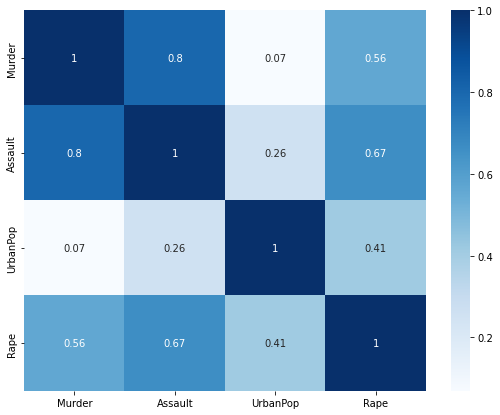

In [312]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

# Heirarchical Clustering

In [313]:
df1=df.copy()

In [314]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [315]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df1.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


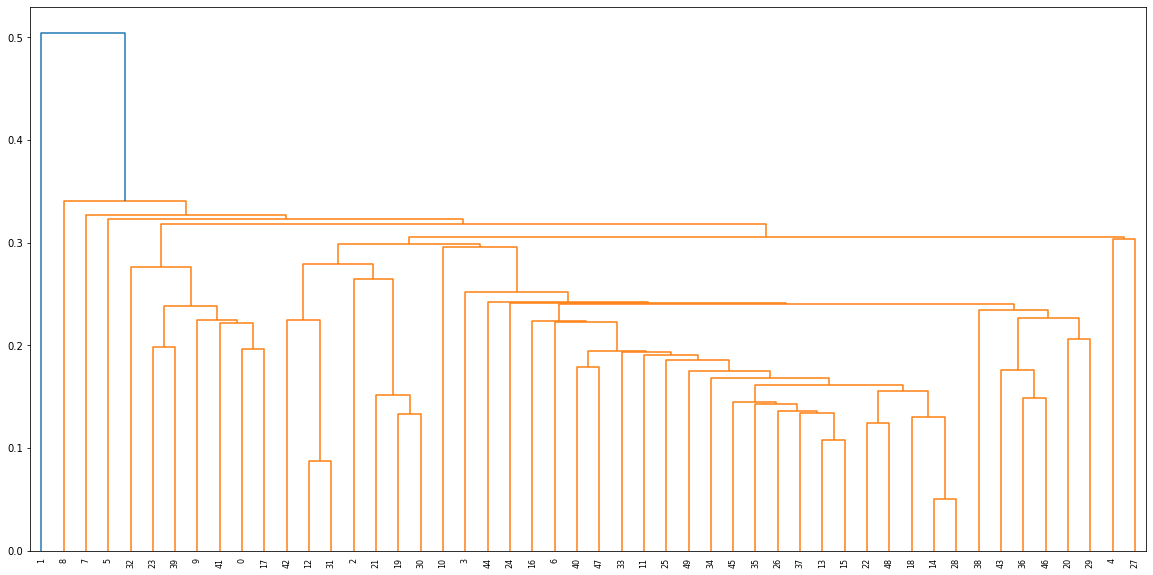

In [316]:
# create dendrogram
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))


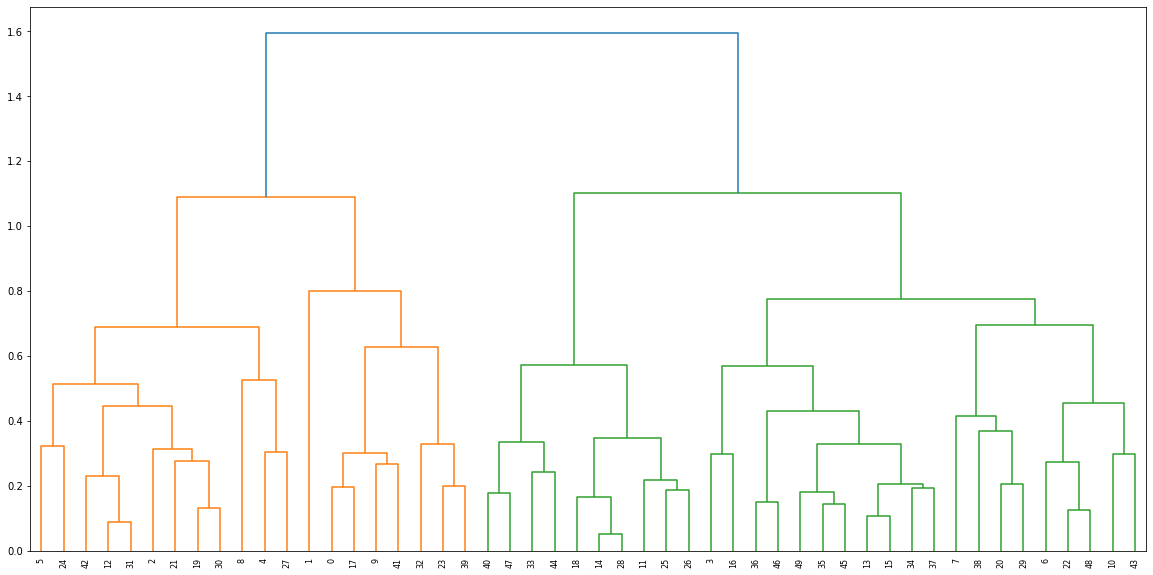

In [317]:
# create dendrogram
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [318]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [319]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [320]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [321]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [322]:
df1['cluster_id'] = y_hc+1

In [323]:
df2=df1.sort_values("cluster_id")
df2.iloc[:,[0,-1]]

,State,cluster_id
0,Alabama,1
17,Louisiana,1
23,Mississippi,1
32,North Carolina,1
39,South Carolina,1
9,Georgia,1
1,Alaska,1
41,Tennessee,1
43,Utah,2
38,Rhode Island,2


# K-Means Clustering

In [324]:
df3=df.copy()

In [325]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df3.iloc[:,1:])

In [326]:
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

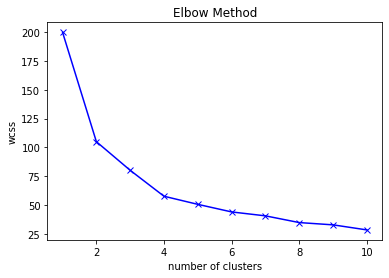

In [327]:
wcss =[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, 'bx-')
plt.title("Elbow Method")
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

* The scree plot levels off at k=4 and let's use it to determine the clusters.

In [328]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [329]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [330]:
kmeans.inertia_

28.311639397122548

In [331]:
#Assign clusters to the data set
df3['kmeans_cluster_id'] = clusters_new.labels_

In [332]:
df3.groupby('kmeans_cluster_id').agg(['mean']).reset_index()

,kmeans_cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [333]:
df3.head()

,State,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [334]:
# Let's see which State falls in which cluster
df3[['State','kmeans_cluster_id']]

,State,kmeans_cluster_id
0,Alabama,1
1,Alaska,2
2,Arizona,2
3,Arkansas,1
4,California,2
5,Colorado,2
6,Connecticut,0
7,Delaware,0
8,Florida,2
9,Georgia,1


## Cluster-Wise

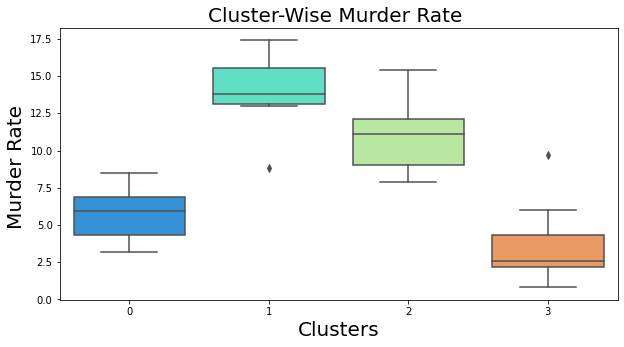

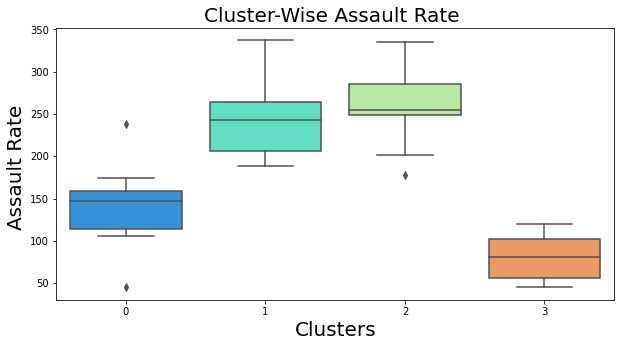

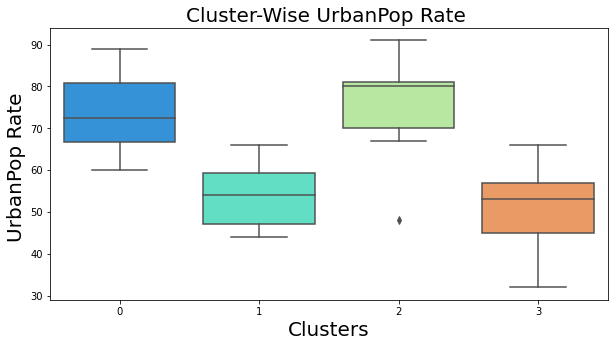

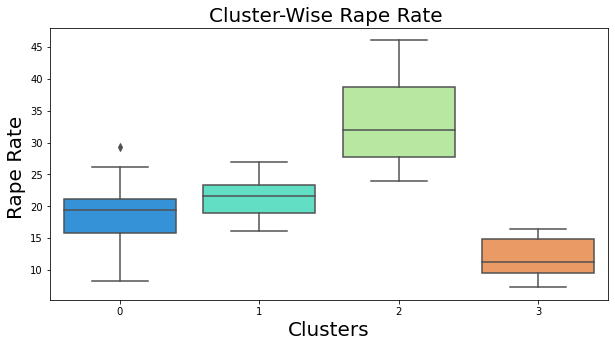

In [335]:
cols=df3[['Murder','Assault','UrbanPop','Rape']]
for i in cols:
  plt.figure(figsize=(10,5))
  s=sns.boxplot(x='kmeans_cluster_id', y=i, data=df3,palette='rainbow')
  plt.title((f'Cluster-Wise {i} Rate '), fontsize = 20)
  s.set_xlabel("Clusters", fontsize = 20)
  s.set_ylabel((f'{i} Rate '), fontsize = 20)
  

# MAP

In [336]:
# We import the geoJSON file. 
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"

# We read the file and print it.
geoJSON_df = gpd.read_file(state_geo)
geoJSON_df.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [337]:
from IPython.display import HTML
import base64

#df_new = geoJSON_df
def create_download_link( df=geoJSON_df, title = "Download CSV file", filename = "data.csv"):  
    csv = geoJSON_df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

In [338]:
kmeans_cluster_id_=df3['kmeans_cluster_id']+1

geoJSON_df["cluster number"] = kmeans_cluster_id_

geoJSON_df = geoJSON_df.rename(columns = {"name":"State"})

geoJSON_df.head()

,id,State,geometry,cluster number
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",2
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",3
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",3
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",2
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",3


In [339]:
final_df = geoJSON_df.merge(df3, on = "State")

In [340]:
map = folium.Map(location=[48, -102], zoom_start=4)

choropleth=folium.Choropleth(
    geo_data=geoJSON_df,
    name='State',
    data=final_df,
    columns=["State", "kmeans_cluster_id"],
    key_on="properties.State",
    fill_color="YlOrBr",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Cluster Number",
    bins=[0,1,2,3,4],
    reset=True,
).add_to(map)



choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['State','cluster number'])
)
map


# DB-Scan

In [341]:
df4=df.copy()

In [342]:
df4=df.drop(["State"], axis=1)

In [343]:
df4.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


In [344]:
array = df4.values

In [345]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [346]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [347]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [348]:
dbscan = DBSCAN(eps=5, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=4)

In [349]:
#Noicy samples are given the label -1
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [350]:
#assign clusters to the dataset
df4["clusterID_db"] = dbscan.labels_
df4.head()

,Murder,Assault,UrbanPop,Rape,clusterID_db
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [351]:
df4.mean()

Murder            7.788
Assault         170.760
UrbanPop         65.540
Rape             21.232
clusterID_db      0.000
dtype: float64